In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import numpy as np 
import seaborn as sns 
%matplotlib inline

In [34]:
df = pd.read_csv("Afegan_Raw.csv", delimiter= ';', index_col= 0)
df.head(10)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,8.18,62,327582,17.5,17.5,0.476,10.0
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,8.13,64,31731688,17.7,17.7,0.470,9.9
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,8.52,67,3696958,17.9,18.0,0.463,9.8
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,7.87,68,2978599,18.2,18.2,0.454,9.5
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,9.20,66,2883167,18.4,18.4,0.448,9.2
2009,58.6,281,77,0.01,5676221682,63,2861,16.2,106,63,9.42,63,284331,18.6,18.7,0.434,8.9
2008,58.1,287,80,0.03,2587392536,64,1599,15.7,110,64,8.33,64,2729431,18.8,18.9,0.433,8.7
2007,57.5,295,82,0.02,1091015598,63,1141,15.2,113,63,6.73,63,26616792,19.0,19.1,0.415,8.4
2006,57.3,295,84,0.03,1717151751,64,1990,14.7,116,58,7.43,58,2589345,19.2,19.3,0.405,8.1


In [35]:
#auto-escalar os dados

# 1 - calcular a média de cada variável
dfm = df.mean()

# 2 - calcular o desvio padrão de cada variável
dfdp = df.std()

# 3 - escalar os dados
dfauto = (df - dfm) / dfdp

dfauto.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,1.354619,0.020364,-1.789967,-0.627896,1.410223,-1.344103,-0.837956,1.601259,-1.798195,0.362721,-0.113208,0.551570,-0.713928,0.163652,0.298303,1.345650,1.236943
2013,1.354619,-0.019479,-1.556493,-0.627896,1.399983,-0.282969,-0.864588,1.360106,-1.565670,0.576086,-0.185162,0.656299,2.067607,0.197746,0.327644,1.221180,1.172294
2012,1.103764,0.033645,-1.206282,-0.627896,-0.800513,1.308732,0.147849,1.118952,-1.255636,0.842793,0.376080,0.813391,-0.415494,0.231841,0.371656,1.075967,1.107645
2011,0.915622,0.073488,-0.972808,-0.627896,1.324341,1.839299,0.244927,0.926029,-0.945603,0.896134,-0.559323,0.865756,-0.479121,0.282982,0.400998,0.889263,0.913700
2010,0.664767,0.126612,-0.622597,-0.627896,1.617342,0.778165,-0.194928,0.684876,-0.558060,0.789452,1.354654,0.761027,-0.487574,0.317076,0.430339,0.764794,0.719754


In [36]:
corr = dfauto.iloc[:,0:17].corr()
corr

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,1.000000,0.067537,-0.933430,-0.095230,0.767439,0.296613,-0.593919,0.983081,-0.929881,0.716072,0.198989,0.744803,0.057482,0.591252,0.677882,0.980128,0.975305
Adult Mortality,0.067537,1.000000,-0.101476,0.200053,-0.016126,-0.000872,0.132412,0.114448,-0.097086,0.090962,0.145882,0.084832,-0.358448,-0.301937,0.403047,0.214960,0.149883
infant deaths,-0.933430,-0.101476,1.000000,0.299178,-0.777185,-0.126823,0.358367,-0.974847,0.999168,-0.661831,-0.121116,-0.695700,0.000707,-0.297367,-0.433697,-0.932985,-0.918203
Alcohol,-0.095230,0.200053,0.299178,1.000000,-0.307484,0.013598,-0.289742,-0.137204,0.287534,0.059467,-0.286383,0.048983,0.024816,0.295228,0.372695,-0.019804,0.005799
percentage expenditure,0.767439,-0.016126,-0.777185,-0.307484,1.000000,0.105538,-0.372490,0.777230,-0.762713,0.516994,0.285991,0.546786,0.007437,0.344165,0.377368,0.743409,0.726314
Hepatitis B,0.296613,-0.000872,-0.126823,0.013598,0.105538,1.000000,-0.279594,0.189363,-0.122195,0.085712,0.286360,0.068002,0.019452,0.442411,0.431813,0.238160,0.235366
Measles,-0.593919,0.132412,0.358367,-0.289742,-0.372490,-0.279594,1.000000,-0.486544,0.351717,-0.269967,-0.132252,-0.304332,-0.358228,-0.902957,-0.773427,-0.536278,-0.519546
BMI,0.983081,0.114448,-0.974847,-0.137204,0.777230,0.189363,-0.486544,1.000000,-0.973396,0.728365,0.124071,0.758824,0.022422,0.458913,0.588753,0.984988,0.978309
under-five deaths,-0.929881,-0.097086,0.999168,0.287534,-0.762713,-0.122195,0.351717,-0.973396,1.000000,-0.649573,-0.104737,-0.683712,-0.014439,-0.288910,-0.422838,-0.929872,-0.916119
Polio,0.716072,0.090962,-0.661831,0.059467,0.516994,0.085712,-0.269967,0.728365,-0.649573,1.000000,-0.055466,0.997883,-0.222992,0.400280,0.486859,0.758909,0.812699


<Axes: >

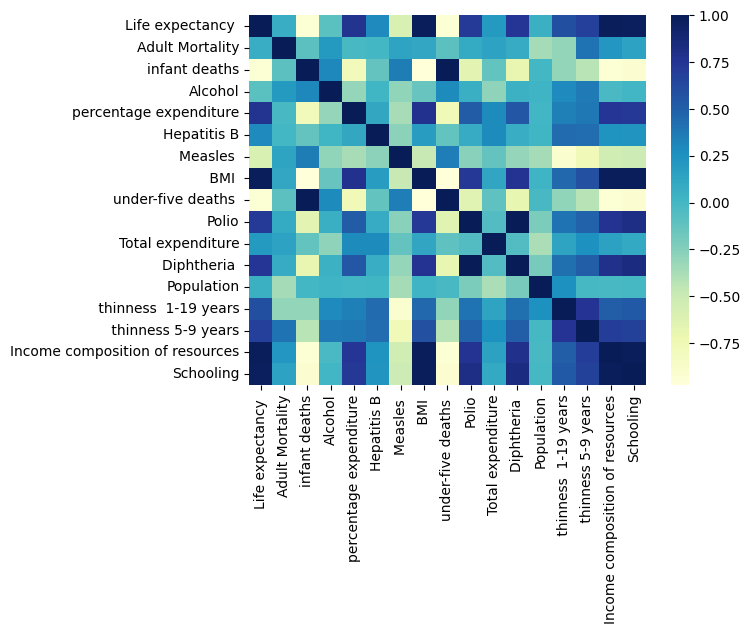

In [37]:
# heatmap
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, cmap= "YlGnBu")

In [38]:
# ACP
x = np.asarray(dfauto.iloc[:,0:17])
x

array([[ 1.35461902,  0.02036421, -1.78996651, -0.62789559,  1.41022262,
        -1.34410306, -0.83795643,  1.60125898, -1.79819492,  0.36272102,
        -0.11320767,  0.55157018, -0.71392796,  0.16365214,  0.29830316,
         1.34564963,  1.23694258],
       [ 1.35461902, -0.01947881, -1.55649262, -0.62789559,  1.39998274,
        -0.28296907, -0.86458822,  1.36010552, -1.56566972,  0.57608633,
        -0.1851617 ,  0.6562987 ,  2.06760667,  0.19774633,  0.32764445,
         1.2211805 ,  1.17229401],
       [ 1.10376365,  0.03364522, -1.20628178, -0.62789559, -0.80051282,
         1.30873193,  0.1478494 ,  1.11895206, -1.25563611,  0.84279296,
         0.37607972,  0.81339147, -0.4154945 ,  0.23184053,  0.37165639,
         1.07596651,  1.10764544],
       [ 0.91562212,  0.07348825, -0.97280788, -0.62789559,  1.32434062,
         1.83929893,  0.24492657,  0.92602929, -0.9456025 ,  0.89613429,
        -0.55932264,  0.86575573, -0.47912122,  0.28298182,  0.40099769,
         0.88926281

In [39]:
pca = PCA(n_components = 10)
pca.fit(x)
pca.components_
pca.components_.shape

(10, 17)

In [40]:
pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_, 2)

array([0.52, 0.14, 0.1 , 0.09, 0.06, 0.04, 0.02, 0.02, 0.01, 0.  ])

In [41]:
pca.explained_variance_ratio_.cumsum()

array([0.51577523, 0.65632241, 0.75989929, 0.85217512, 0.90771717,
       0.94954793, 0.96838465, 0.98470061, 0.99676837, 0.99947305])

Text(0, 0.5, 'Eigenvalue')

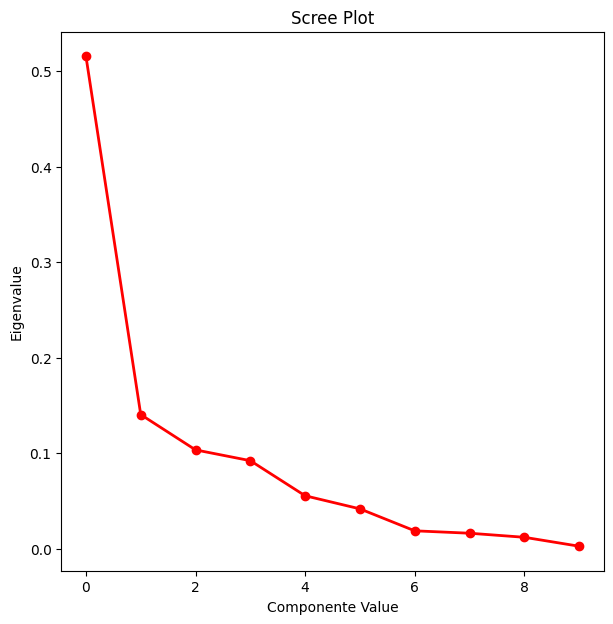

In [42]:
fig = plt.figure(figsize = (7,7))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Componente Value')
plt.ylabel('Eigenvalue')

In [43]:
pca = PCA(n_components = 4)
pca.fit(x)
pca.components_

array([[-3.33579930e-01, -3.87532739e-02,  3.07731202e-01,
         1.43108762e-02, -2.61258059e-01, -9.43082355e-02,
         2.02946845e-01, -3.28539376e-01,  3.05311809e-01,
        -2.67179382e-01, -5.95735283e-02, -2.75858571e-01,
         5.03162724e-04, -2.03762809e-01, -2.42029444e-01,
        -3.32973785e-01, -3.32907723e-01],
       [-4.75869616e-03, -1.29217703e-01,  2.06554345e-01,
         4.02832888e-01, -1.49559433e-01,  2.55361545e-01,
        -4.53675948e-01, -9.70771033e-02,  2.05097446e-01,
        -9.84694564e-02, -4.32991750e-02, -9.90027739e-02,
         2.85298373e-01,  4.69765936e-01,  3.27274236e-01,
        -4.13947251e-02, -3.43951396e-02],
       [ 5.64798159e-02, -5.87022644e-01, -1.19619091e-01,
        -3.15691468e-01,  1.48386922e-01, -1.20108275e-01,
        -9.02989694e-02,  6.54530202e-02, -1.27509274e-01,
        -1.06562665e-01, -2.57612279e-01, -8.91617835e-02,
         5.31703347e-01,  8.15166257e-02, -3.10777504e-01,
        -3.66669419e-02, -1.2

In [50]:
pca1 = pca.transform(x)[:,0]
pca2 = pca.transform(x)[:,1]
pca3 = pca.transform(x)[:,2]
pca4 = pca.transform(x)[:,3]
df['pca1'] = pca1
df['pca2'] = pca2
df['pca3'] = pca3
df['pca4'] = pca4
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,pca1,pca2,pca3,pca4
Year,,,,,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,...,62,327582,17.5,17.5,0.476,10.0,-3.707377,-1.542821,0.675060,0.216134
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,...,64,31731688,17.7,17.7,0.470,9.9,-3.617860,-0.335461,1.962960,0.179663
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,...,67,3696958,17.9,18.0,0.463,9.8,-2.721328,-0.641438,-0.300782,-0.428849
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,...,68,2978599,18.2,18.2,0.454,9.5,-2.879488,-0.681558,0.029009,-0.378754
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,...,66,2883167,18.4,18.4,0.448,9.2,-2.522959,-0.654209,-0.389015,-1.361863


In [45]:
valores_k = []
S =[]

for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, n_init = 'auto').fit(x)
    valores_k.append(i)
    S.append(metrics.silhouette_score(x, kmeans.labels_))
    

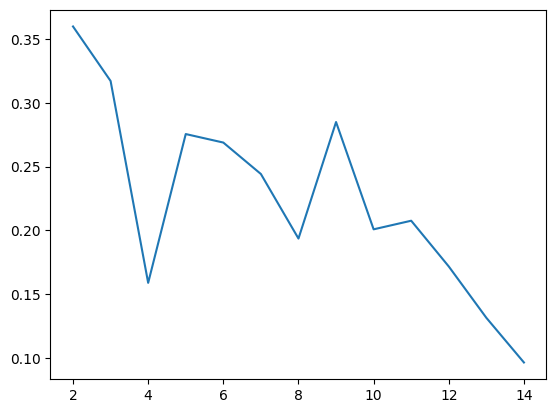

In [46]:
fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 4, n_init = 'auto').fit(x)
kmeans.labels_
centroids = kmeans.cluster_centers_
metrics.silhouette_score(x, kmeans.labels_)

0.3138626651845518

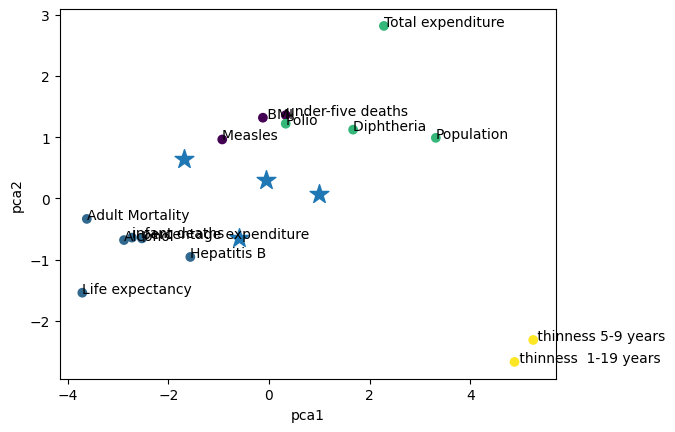

In [48]:
fig, ax = plt.subplots()
ax.scatter(df['pca1'], df['pca2'], c=kmeans.labels_)
#ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=200)

plt.xlabel('pca1')
plt.ylabel('pca2')
text = [ax.text(x, y, t) for x, y, t in zip (pca1, pca2, df.columns)]

plt.show()